<a href="https://colab.research.google.com/github/phdepaula/Analysis-Of-Brazilian-Suicides/blob/main/suicidios_no_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analises de suícidios ocorridos no brasil entre os anos de 2010 e 2019

Este trabalho tem como objetivo analisar os suicídios ocorridos no Brasil entre 2010 e 2019.

A pesquisa baseia-se em dados provenientes de um dataset elaborado a partir de informações extraídas do Sistema de Informação sobre Mortalidade (SIM).

## Definição do Problema

O objetivo principal deste projeto é compreender os fatores que estão correlacionados ou influenciam as taxas de suicídio no Brasil ao longo de uma década, levando em consideração aspectos demográficos, geográficos e temporais.

Este é um problema de aprendizado não supervisionado, pois não há uma variável alvo previamente definida. O modelo buscará identificar padrões e agrupamentos nos dados, permitindo a descoberta de tendências ocultas que possam contribuir para uma compreensão mais profunda dos fatores associados ao suicídio.

Parte-se do pressuposto de que o suicídio no Brasil é influenciado por uma combinação de fatores, como:

* Fatores demográficos, incluindo raça e sexo.
* Fatores sociais, como ocupação e acesso à assistência médica.
* A distribuição geográfica dos suicídios, que pode variar significativamente entre diferentes estados do Brasil.

O dataset de suicídios selecionado contém os seguintes atributos:

* **Estado**: Indica o estado onde o suicídio foi registrado.
* **Ano**: Refere-se ao ano do registro do suicídio.
* **Mês**: Refere-se ao mês do registro do suicídio.
* **DTOBITO**: Data em que o óbito foi registrado.
* **DTNASC**: Data de nascimento do indivíduo.
* **SEXO**: Gênero do indivíduo.
* **RACACOR**: Raça/cor do indivíduo, conforme a classificação do IBGE.
* **ASSISTMED**: Informa se o indivíduo recebeu assistência médica antes do óbito.
* **ESCMAE**: Nível de escolaridade da mãe do indivíduo.
* **ESTCIV**: Estado civil do indivíduo.
* **ESC**: Nível de escolaridade do indivíduo, medido em anos de estudo.
* **OCUP**: Ocupação profissional do indivíduo.
* **CODMUNRES**: Indica a cidade onde o óbito foi registrado.
* **CAUSABAS e CAUSABAS_O**: Causa básica da morte, conforme a Classificação Internacional de Doenças (CID).
* **LOCOCOR**: Local onde ocorreu o óbito.
* **CIRURGIA**: Informa se o indivíduo passou por algum procedimento cirúrgico.

## Análise dos Dados

Nesta etapa, será realizada uma análise dos dados importados do dataset armazenado no repositório do GitHub.

### Criação do dataframe

Para iniciar a análise, o primeiro passo é criar um dataframe, no qual serão importadas e armazenadas as informações do dataset.

É importante destacar que a primeira coluna, que representa apenas o ID dos registros, será removida, pois não possui relevância para a nossa análise.

In [ ]:
# Criando dataframe

import pandas as pd

url = "https://raw.githubusercontent.com/phdepaula/Analysis-Of-Brazilian-Suicides/main/dataset/suicides_dataset.csv"
df_csv = pd.read_csv(url)
dataframe = df_csv.drop(df_csv.columns[0], axis=1)

<ipython-input-139-0698947f8a04>:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(url)


### Características do Dataframe

Nesse trecho serão realizados algumas análises em relação ao dataframe obtido na seção anterior.

#### Quantidade de Atributos

Nessa seção será analisada a quantidade de atributos do dataframe.

In [ ]:
# Obtendo quantidade de atributos

numero_atributos = dataframe.shape[1]
print(f"O dataframe possui {numero_atributos} atributos.")

O dataframe possui 17 atributos.


#### Tipos de Dados dos Atributos

Nessa seção serão analisados os tipos de dados dos atributos do dataframe.

In [ ]:
# Obtendo os tipos das colunas

tipos_colunas = dataframe.dtypes
print(tipos_colunas)

estado        object
ano            int64
mes            int64
DTOBITO       object
DTNASC        object
SEXO          object
RACACOR       object
ASSISTMED     object
ESCMAE        object
ESTCIV        object
ESC           object
OCUP          object
CODMUNRES     object
CAUSABAS      object
CAUSABAS_O    object
LOCOCOR       object
CIRURGIA      object
dtype: object


Como podemos observar, o DataFrame contém dois tipos de dados nos atributos:

* **Inteiros**: representados pelo tipo int64, que armazena valores numéricos inteiros.
* **Texto**: representado pelo tipo object, que é usado para armazenar strings. Esse tipo é uma forma genérica de armazenar dados textuais e pode conter valores mistos.

#### Primeiras Linhas do Dataframe

Nessa seção será analisado o conteudo das cinco primeiras linhas do dataframe.

In [ ]:
# Obtendo o head do daframe

print(dataframe.head())

  estado   ano  mes     DTOBITO      DTNASC       SEXO RACACOR ASSISTMED  \
0     AC  2010    1  2010-01-31  1999-11-09  Masculino   Parda       NaN   
1     AC  2010    2  2010-02-07  1985-09-23  Masculino   Parda       NaN   
2     AC  2010    2  2010-02-19  1995-08-06  Masculino   Parda       NaN   
3     AC  2010    4  2010-04-20  1983-12-25   Feminino   Parda       NaN   
4     AC  2010    7  2010-07-24  1982-05-13  Masculino   Parda       NaN   

  ESCMAE      ESTCIV         ESC          OCUP CODMUNRES CAUSABAS CAUSABAS_O  \
0    NaN  Solteiro/a  1 a 3 anos     ESTUDANTE  Tarauacá     X780       X780   
1    NaN  Solteiro/a  1 a 3 anos     ESTUDANTE  Tarauacá     X780       X780   
2    NaN  Solteiro/a  1 a 3 anos     ESTUDANTE  Tarauacá     X780       X780   
3    NaN    Casado/a  1 a 3 anos  DONA DE CASA  Tarauacá     X780       X780   
4    NaN    Casado/a         NaN  DONA DE CASA  Tarauacá     X720       X720   

       LOCOCOR CIRURGIA  
0  Via pública      Não  
1     Hosp


Ao analisar as cinco primeiras linhas do dataFrame, podemos observar que há dados faltantes nas colunas ASSISTMED e ESCMAE.

Isso indica a necessidade de atenção para a ausência de informações nessas colunas no dataframe.

#### Valores Faltantes

Nessa seção será analisada a quantidade de valores faltantes em cada um dos atributos do dataframe.

In [ ]:
# Obtendo quantidade total de dados
total_dados = len(dataframe)

# Obtendo valores faltantes por coluna
valores_faltantes = dataframe.isna().sum()

# Calculando o percentual do total
percentuais_faltantes = round((valores_faltantes / total_dados) * 100, 2)

# Função para categorizar o grau de impacto
def categorizar_impacto(percentual):
    if percentual == 0:
        return 'Sem impacto'
    elif 0 < percentual <= 5:
        return 'Mínimo'
    elif 5 < percentual <= 20:
        return 'Moderado'
    elif 20 < percentual <= 50:
        return 'Elevado'
    else:
        return 'Crítico'

# Gerando resultado
resultado = pd.DataFrame({
    'Quantidade Faltante': valores_faltantes,
    'Percentual do Total (%)': percentuais_faltantes
})
resultado['Grau de Impacto'] = resultado['Percentual do Total (%)'].apply(categorizar_impacto)

print("Resultado final por coluna:\n")
print(resultado.sort_values(by='Quantidade Faltante'))

Resultado final por coluna:

            Quantidade Faltante  Percentual do Total (%) Grau de Impacto
estado                        0                     0.00     Sem impacto
ano                           0                     0.00     Sem impacto
mes                           0                     0.00     Sem impacto
DTOBITO                       0                     0.00     Sem impacto
CODMUNRES                     0                     0.00     Sem impacto
CAUSABAS                      0                     0.00     Sem impacto
SEXO                         22                     0.02          Mínimo
CAUSABAS_O                  287                     0.26          Mínimo
LOCOCOR                     460                     0.41          Mínimo
RACACOR                    3171                     2.82          Mínimo
ESTCIV                     8700                     7.73        Moderado
DTNASC                    10858                     9.65        Moderado
ESC                   

Conforme observado no dataframe acima, foi realizado o cálculo da quantidade de dados faltantes por atributo, bem como o percentual desses valores em relação ao total de registros no dataframe. Além disso, com base nesses cálculos, foi categorizado o grau de impacto dos dados ausentes na análise da seguinte forma:

* **Sem Impacto (0%)**: Nenhuma ausência de dados no atributo.
* **Impacto Mínimo (>0% a 5%)**: Quantidade de dados ausentes considerada insignificante, com pouca ou nenhuma influência nos resultados da análise.
* **Impacto Moderado (>5% a 20%)**: Quantidade de dados ausentes que pode começar a afetar a precisão da análise, exigindo maior atenção.
* **Impacto Elevado (>20% a 50%)**: Alta quantidade de dados faltantes, potencialmente comprometendo a qualidade das conclusões.
* **Impacto Crítico (>50%)**: Mais da metade dos dados está ausente, inviabilizando ou distorcendo significativamente qualquer análise.

Levando em consideração a análise realizada, foram registrados os seguintes resultados para cada um dos atributos do dataframe:

* **Sem Impacto**: Os atributos estado, ano, mes, DTOBITO, CODMUNRES e CAUSABAS não possuem valores faltantes, indicando uma cobertura completa e sem impacto na análise.

* **Mínimo**: Os atributos SEXO, RACACOR, CAUSABAS_O e LOCOCOR apresentam percentuais muito baixos de valores faltantes (de 0.02% a 2.82%), sugerindo um impacto mínimo e que a análise pode ser realizada com confiança.

* **Moderado**: Os atributos DTNASC e ESTCIV têm percentuais moderados de valores faltantes (9.65% e 7.73%, respectivamente), o que pode ser relevante para a análise e deve ser considerado na interpretação dos resultados.

* **Elevado**: Os atributos ASSISTMED, ESC e OCUP apresentam percentuais elevados de dados faltantes (de 25.04% a 46.42%). Esses atributos têm um impacto significativo e sua análise deve ser feita com atenção especial devido à quantidade considerável de dados ausentes.

* **Crítico**: Os atributos ESCMAE e CIRURGIA têm percentuais extremamente altos de dados faltantes (99.99% e 92.40%, respectivamente), o que compromete gravemente a análise. A ausência quase total de dados exige uma abordagem cuidadosa para lidar com essas informações faltantes.

#### Valores Inconsistentes

Nessa seção será analisada a presença de valores inconsistentes em cada um dos atributos do dataframe.

In [ ]:
import numpy as np

from datetime import datetime

# Verificando tipos de dados diferentes
resultado = {}

for atributo in dataframe.columns:
    # Obtendo os valores distintos
    valores_distintos = dataframe[atributo].unique()

    # Removendo valores vazios (NaN e strings vazias)
    valores_sem_vazios = [valor for valor in valores_distintos if pd.notna(valor) and valor != '']

    # Salvando resultado
    resultado[atributo] = valores_sem_vazios

# Validando resultados de Estado
resultado_estado = resultado["estado"]
erros_estado = []

for estado in resultado_estado:
    if not isinstance(estado, str):
        erros_estado.append(estado)
    elif isinstance(estado, str) and len(estado) > 2:
        erros_estado.append(estado)

print(f"Valores inconsistentes de estado: {erros_estado}.")

# Validando resultados de ano

resultado_ano = resultado["ano"]
erros_ano = []

for ano in resultado_ano:
    if not isinstance(ano, np.integer):
        erros_ano.append(ano)

print(f"Valores inconsistentes de ano: {erros_ano}.")

# Validando resultados de mes

resultado_mes = resultado["mes"]
erros_mes = []

for mes in resultado_mes:
    if not isinstance(mes, np.integer):
        erros_mes.append(mes)
    elif isinstance(mes, np.integer) and not (1 <= mes <= 12):
        erros_mes.append(mes)

print(f"Valores inconsistentes de mes: {erros_mes}.")

# Validando resultados de DTOBITO e DTNASC

def validar_formato_data(data_str):
    # Verifica se a data está no formato Y-m-d
    try:
        datetime.strptime(data_str, '%Y-%m-%d')
        return True
    except ValueError:
        return False

tipo_datas = ["DTOBITO", "DTNASC"]

for tipo_data in tipo_datas:
    resultado_data = resultado[tipo_data]
    erros_data = []

    for data in resultado_data:
        if not isinstance(data, str):
            erros_data.append(data)
        elif isinstance(data, str) and not validar_formato_data(data):
            erros_data.append(data)

    print(f"Valores inconsistentes de {tipo_data}: {erros_data}.")

# Validando resultado de SEXO

resultado_sexo = resultado["SEXO"]
erros_sexo = []

for sexo in resultado_sexo:
    if not isinstance(sexo, str):
        erros_sexo.append(sexo)
    elif isinstance(sexo, str) and sexo not in ['Masculino', 'Feminino']:
        erros_sexo.append(sexo)

print(f"Valores inconsistentes de SEXO: {erros_sexo}.")

# Validando resultado de RACACOR, ESCMAE, ESTCIV, ESC, OCUP, CAUSABAS, CAUSABAS_O, LOCOCOR

tipos_str = ["RACACOR", "ESCMAE", "ESTCIV", "ESC", "OCUP", "CAUSABAS", "CAUSABAS_O", "LOCOCOR"]

for nome_str in tipos_str:
    resultado_str = resultado[nome_str]
    erros_str = []

    for valor_str in resultado_str:
        if not isinstance(valor_str, str):
            erros_str.append(valor_str)

    print(f"Valores inconsistentes de {nome_str}: {erros_str}.")

# Validando resultado de ASSISTMED, CIRURGIA

tipos_afirmativa = ["ASSISTMED", "CIRURGIA"]

for nome_afirmativa in tipos_afirmativa:
    resultado_afirmativa = resultado[nome_afirmativa]
    erros_afirmativa = []

    for valor_afirmativa in resultado_afirmativa:
        if not isinstance(valor_afirmativa, str):
            erros_afirmativa.append(valor_afirmativa)
        elif isinstance(valor_afirmativa, str) and valor_afirmativa not in ['Não', 'Sim']:
            erros_afirmativa.append(valor_afirmativa)

    print(f"Valores inconsistentes de {nome_afirmativa}: {erros_afirmativa}.")

Valores inconsistentes de estado: [].
Valores inconsistentes de ano: [].
Valores inconsistentes de mes: [].
Valores inconsistentes de DTOBITO: [].
Valores inconsistentes de DTNASC: [].
Valores inconsistentes de SEXO: [].
Valores inconsistentes de RACACOR: [].
Valores inconsistentes de ESCMAE: [].
Valores inconsistentes de ESTCIV: [].
Valores inconsistentes de ESC: [].
Valores inconsistentes de OCUP: [].
Valores inconsistentes de CAUSABAS: [].
Valores inconsistentes de CAUSABAS_O: [].
Valores inconsistentes de LOCOCOR: [].
Valores inconsistentes de ASSISTMED: [].
Valores inconsistentes de CIRURGIA: [].


Como podemos observar na análise realizada, critérios específicos foram estabelecidos para validar cada atributo e identificar valores inconsistentes. O objetivo dessas validações foi garantir a integridade e a confiabilidade dos dados, assegurando que cada atributo seguisse o formato e os padrões esperados.

Critérios de Validação:

* **Atributo estado**:
  * **Critério**: Verificar se o valor é uma string e se contém exatamente duas letras.
  * **Racional**: As siglas dos estados brasileiros são compostas por duas letras (ex.: SP, RJ).
* **Atributo ano**:
  * **Critério**: Verificar se o valor é um número inteiro.
  * **Racional**: O ano deve ser representado como um valor numérico inteiro.
* **Atributo mês**:
  * **Critério**: Verificar se o valor é um número inteiro e se está no intervalo de 1 a 12.
  * **Racional**: Como o calendário tem 12 meses, o valor deve estar entre 1 (janeiro) e 12 (dezembro).
* **Atributos de datas (DTOBITO e DTNASC)**:
  * **Critério**: Verificar se a data segue o formato "YYYY-MM-DD".
  * **Racional**: Garantir que as datas sigam o formato padrão de ano, mês e dia (YYYY-MM-DD) evita inconsistências que podem surgir de formatos incorretos, como a inversão de dia e mês, ou dados mal formatados que não são reconhecidos como datas válidas.
* **Atributo SEXO**:
  * **Critério**: Verificar se o valor é uma string e se está limitado a "Masculino" ou "Feminino".
  * **Racional**: Para manter a consistência nas análises de gênero, os valores aceitos são "Masculino" e "Feminino".
* **Atributos categóricos (RACACOR, ESCMAE, ESTCIV, ESC, OCUP, CAUSABAS, CAUSABAS_O, LOCOCOR)**:
  * **Critério**: Verificar se o valor é uma string.
  * **Racional**: Esses atributos contêm categorias pré-definidas que devem ser representadas por strings.
* **Atributos binários (ASSISTMED e CIRURGIA)**:
  * **Critério**: Verificar se o valor é uma string e se está limitado a "Sim" ou "Não".
  * **Racional**: Esses atributos representam respostas binárias (afirmativas ou negativas).

Após a realização dessas validações, não foram encontradas inconsistências em nenhum dos atributos analisados. Todos os dados atendem aos critérios estabelecidos, garantindo que o conjunto de dados esteja limpo e preparado para as próximas etapas da análise. Com isso, podemos seguir com a confiança de que as informações são consistentes e adequadas para as análises subsequentes.

### Análise Estatística

Nesta etapa, o dataframe será subdividido em diferentes grupos para permitir análises estatísticas detalhadas, visando explorar padrões e tendências específicas em cada conjunto de dados. Para cada grupo, serão calculadas as seguintes métricas estatísticas: valores mínimos e máximos, média, moda, mediana e desvio padrão, proporcionando uma visão abrangente das características e variações dos dados.

#### Quantidades de Óbitos por Ano e Mês

In [ ]:
# Analisando a quantidade de obitos por mes e ano

import numpy as np
from scipy import stats

# Agrupando por 'ano' e 'mes' e contando o número de óbitos (linhas) em cada grupo
df_obitos_por_mes_ano = dataframe.groupby(['ano', 'mes']).size().reset_index(name='quantidade_obitos')

# Calculando as estatísticas
quantidades = df_obitos_por_mes_ano['quantidade_obitos']

# Estatísticas
minimo = round(quantidades.min(), 2)
maximo = round(quantidades.max(), 2)
media = round(quantidades.mean(), 2)
mediana = round(quantidades.median(), 2)

# Calculando a moda
moda_result = stats.mode(quantidades, keepdims=True)
moda = moda_result.mode[0]

desvio_padrao = round(quantidades.std(), 2)

estatisticas = pd.Series({
    'Mínimo': minimo,
    'Máximo': maximo,
    'Média': media,
    'Mediana': mediana,
    'Moda': moda,
    'Desvio-padrão': desvio_padrao
})

# Exibindo os resultados
print(estatisticas)

Mínimo            702.00
Máximo           1225.00
Média             937.42
Mediana           921.50
Moda              882.00
Desvio-padrão     119.83
dtype: float64


Na análise realizada, foi criado um novo dataframe para consolidar o número total de óbitos por mês e ano a partir do dataframe original, que continha registros individuais de cada óbito.

Após essa reorganização dos dados, foi conduzido um estudo estatístico que gerou os seguintes resultados:

* **Mínimo (702)**: O menor número de óbitos registrados em um único mês foi 702. Esse valor representa o ponto mais baixo de óbitos no período analisado, indicando um mês de menor mortalidade.

* **Máximo (1225)**: O maior número de óbitos registrados em um único mês foi 1225. Isso mostra o ponto mais alto de mortalidade em um mês específico.

* **Média (937,42)**: A média de 937,42 óbitos por mês indica o valor médio de mortes ao longo do tempo analisado. Esse número nos ajuda a entender a mortalidade típica mensal, servindo como uma referência central dos dados.

* **Mediana (921,5)**: A mediana de 921,5 óbitos é o valor central da distribuição, o que significa que metade dos meses teve mais do que 921 óbitos e a outra metade teve menos. A mediana é uma métrica importante, pois não é influenciada por valores extremos como a média, oferecendo uma visão equilibrada.

* **Moda (882)**: A moda de 882 representa o número de óbitos mais frequente em um mês. Isso indica que, ao longo do período analisado, houve vários meses com exatamente 882 óbitos, sugerindo que esse valor foi comum.

* **Desvio-padrão (119,83)**: O desvio-padrão de 119,83 reflete a variação dos dados em torno da média. Esse valor indica que a maioria dos meses teve um número de óbitos relativamente próximo à média de 937,42, com algumas flutuações.

#### Quantidades de Óbitos por Ano, Mês e Sexo

In [ ]:
# Analisando a quantidade de obitos por mes, ano e SEXO

import numpy as np
from scipy import stats

# Agrupando por 'ano', 'mes', e 'SEXO', e contando o número de óbitos (linhas) em cada grupo
df_obitos_por_sexo_mes_ano = dataframe.groupby(['ano', 'mes', 'SEXO']).size().reset_index(name='quantidade_obitos')

# Calculando as estatísticas por sexo
def calcular_estatisticas_por_sexo(df, sexo):
    df_sexo = df[df['SEXO'] == sexo]
    quantidades = df_sexo['quantidade_obitos']

    # Estatísticas
    minimo = round(quantidades.min(), 2)
    maximo = round(quantidades.max(), 2)
    media = round(quantidades.mean(), 2)
    mediana = round(quantidades.median(), 2)

    # Calculando a moda
    moda_result = stats.mode(quantidades, keepdims=True)
    moda = moda_result.mode[0]

    desvio_padrao = round(quantidades.std(), 2)

    return pd.Series({
        'Mínimo': minimo,
        'Máximo': maximo,
        'Média': media,
        'Mediana': mediana,
        'Moda': moda,
        'Desvio-padrão': desvio_padrao
    })

# Calculando as estatísticas para cada sexo
estatisticas_feminino = calcular_estatisticas_por_sexo(df_obitos_por_sexo_mes_ano, 'Feminino')
estatisticas_masculino = calcular_estatisticas_por_sexo(df_obitos_por_sexo_mes_ano, 'Masculino')

# Exibindo os resultados
print("Estatísticas para o Sexo Feminino:")
print(estatisticas_feminino)

print("\nEstatísticas para o Sexo Masculino:")
print(estatisticas_masculino)


Estatísticas para o Sexo Feminino:
Mínimo           131.00
Máximo           274.00
Média            200.62
Mediana          198.50
Moda             177.00
Desvio-padrão     28.64
dtype: float64

Estatísticas para o Sexo Masculino:
Mínimo           544.00
Máximo           967.00
Média            736.62
Mediana          720.50
Moda             679.00
Desvio-padrão     95.20
dtype: float64


Na análise realizada, foi criado um novo dataframe para consolidar o número total de óbitos por mês e ano, discriminado por sexo, a partir do dataframe original, que continha registros individuais de cada óbito. Após a reorganização dos dados, foi conduzido um estudo estatístico separado para os sexos feminino e masculino. Os resultados obtidos são os seguintes:
<br><br/>
**Estatísticas para o Sexo Feminino**:

* **Mínimo (131,00)**: O menor número de óbitos registrados em um único mês para o sexo feminino foi 131.

* **Máximo (274,00)**: O maior número de óbitos registrados em um único mês para o sexo feminino foi 274.

* **Média (200,62)**: A média de 200,62 óbitos por mês para o sexo feminino sugere que, em média, houve cerca de 201 mortes mensais.

* **Mediana (198,50)**: A mediana de 198,50 óbitos indica que metade dos meses registrou mais do que 198 óbitos e a outra metade teve menos.

* **Moda (177,00)**: A moda de 177 óbitos representa o número mais frequente de óbitos em um mês para o sexo feminino.

* **Desvio-padrão (28,64)**: O desvio-padrão de 28,64 reflete a variação dos dados em torno da média de 200,62.
<br><br/>

**Estatísticas para o Sexo Masculino**:
* **Mínimo (544,00)**: O menor número de óbitos registrados em um único mês para o sexo masculino foi 544.

* **Máximo (967,00)**: O maior número de óbitos registrados em um único mês para o sexo masculino foi 967.

* **Média (736,62)**: A média de 736,62 óbitos por mês para o sexo masculino sugere que, em média, houve cerca de 737 mortes mensais.

* **Mediana (720,50)**: A mediana de 720,50 óbitos indica que metade dos meses registrou mais do que 720 óbitos e a outra metade teve menos.

* **Moda (679,00)**: A moda de 679 óbitos representa o número mais frequente de óbitos em um mês para o sexo masculino.

* **Desvio-padrão (95,20)**: O desvio-padrão de 95,20 reflete a variação dos dados em torno da média de 736,62.

Dessa forma, os resultados evidenciam uma discrepância notável na mortalidade entre os sexos. Os óbitos masculinos são consistentemente mais elevados em comparação com os femininos, tanto em termos de valores mínimos e máximos quanto na média, mediana e moda. Além disso, a maior variabilidade nos dados de mortalidade masculina sugere que a mortalidade masculina é mais variável e extrema.

#### Quantidades de Óbitos por Ano, Mês e Raça

In [ ]:
# Analisando a quantidade de obitos por mes, ano e Raça

import numpy as np
from scipy import stats

# Agrupando por 'ano', 'mes' e 'RACACOR', e contando o número de óbitos (linhas) em cada grupo
df_obitos_por_raca_mes_ano = dataframe.groupby(['ano', 'mes', 'RACACOR']).size().reset_index(name='quantidade_obitos')

# Função para calcular estatísticas
def calcular_estatisticas_por_raca(df):
    quantidades = df['quantidade_obitos']

    minimo = round(quantidades.min(), 2) if not quantidades.empty else np.nan
    maximo = round(quantidades.max(), 2) if not quantidades.empty else np.nan
    media = round(quantidades.mean(), 2) if not quantidades.empty else np.nan
    mediana = round(quantidades.median(), 2) if not quantidades.empty else np.nan

    moda_result = stats.mode(quantidades, keepdims=True)
    moda = moda_result.mode[0] if moda_result.count[0] > 0 and len(moda_result.mode) > 0 else np.nan

    desvio_padrao = round(quantidades.std(), 2) if not quantidades.empty else np.nan

    return pd.Series({
        'Mínimo': minimo,
        'Máximo': maximo,
        'Média': media,
        'Mediana': mediana,
        'Moda': moda,
        'Desvio-padrão': desvio_padrao,
    })

# Aplicando a função para cada raça
estatisticas_por_raca = df_obitos_por_raca_mes_ano.groupby('RACACOR').apply(calcular_estatisticas_por_raca)

# Exibindo os resultados
print("Estatísticas para cada raça:\n")
print(estatisticas_por_raca)

Estatísticas para cada raça:

          Mínimo  Máximo   Média  Mediana   Moda  Desvio-padrão
RACACOR                                                        
Amarela      1.0     8.0    3.65      3.0    3.0           1.73
Branca     354.0   600.0  467.29    464.0  416.0          57.41
Indígena     3.0    23.0    9.89     10.0    8.0           3.68
Parda      244.0   538.0  380.79    364.0  354.0          66.18
Preta       30.0    72.0   49.41     51.0   52.0           8.95


Na análise realizada, foi criado um novo dataframe para consolidar o número total de óbitos por mês e ano, discriminado por raça, a partir do dataframe original, que continha registros individuais de cada óbito. Após essa reorganização dos dados, foi conduzido um estudo estatístico separado para cada raça. Os resultados obtidos foram os seguintes:

* **Raça Amarela**: a raça amarela apresentou a menor média de óbitos, com uma média de 3.65 por mês e ano. O número de óbitos variou entre 1 e 8, com uma mediana de 3 e moda de 3. O desvio-padrão foi de 1.73, indicando baixa variação em torno da média.

* **Raça Branca**: a raça branca apresentou a média de óbitos mais alta, com 467.29 por mês e ano. O número de óbitos variou significativamente entre 354 e 600, com uma mediana de 464 e uma moda de 416. O desvio-padrão foi de 57.41, indicando uma variação considerável em torno da média.

* **Raça Indígena**: a raça indígena teve uma média de 9.89 óbitos, com valores que variaram entre 3 e 23. A mediana foi de 10 e a moda foi 8. O desvio-padrão foi de 3.68, o que demonstra uma variação moderada em torno da média.

* **Raça Parda**: a raça parda apresetou uma média de 380.79 óbitos, com valores variando de 244 a 538. A mediana foi de 364 e a moda foi 354. O desvio-padrão foi de 66.18, sugerindo uma variação mais ampla em torno da média.

* **Raça Preta**: A raça preta teve a menor média entre os grupos comparados, com 49.41 óbitos. O número de óbitos variou entre 30 e 72, com uma mediana de 51 e uma moda de 52. O desvio-padrão foi de 8.95, indicando uma variação moderada em torno da média.

#### Quantidade de Óbitos Por Ano, Mês e Estado

In [ ]:
# Analisando a quantidade de obitos por ano, mês e estado

import numpy as np
from scipy import stats

# Agrupando por 'ano', 'mes' e 'estado', e contando o número de óbitos (linhas) em cada grupo
df_obitos_por_estado_mes_ano = dataframe.groupby(['ano', 'mes', 'estado']).size().reset_index(name='quantidade_obitos')

# Função para calcular estatísticas
def calcular_estatisticas_por_estado(df):
    quantidades = df['quantidade_obitos']

    minimo = round(quantidades.min(), 2) if not quantidades.empty else np.nan
    maximo = round(quantidades.max(), 2) if not quantidades.empty else np.nan
    media = round(quantidades.mean(), 2) if not quantidades.empty else np.nan
    mediana = round(quantidades.median(), 2) if not quantidades.empty else np.nan

    moda_result = stats.mode(quantidades, keepdims=True)
    moda = moda_result.mode[0] if moda_result.count[0] > 0 and len(moda_result.mode) > 0 else np.nan

    desvio_padrao = round(quantidades.std(), 2) if not quantidades.empty else np.nan

    return pd.Series({
        'Mínimo': minimo,
        'Máximo': maximo,
        'Média': media,
        'Mediana': mediana,
        'Moda': moda,
        'Desvio-padrão': desvio_padrao,
    })

# Aplicando a função para cada estado
estatisticas_por_estado = df_obitos_por_estado_mes_ano.groupby('estado').apply(calcular_estatisticas_por_estado)

# Exibindo os resultados
print("Estatísticas para cada estado:\n")
print(estatisticas_por_estado)

Estatísticas para cada estado:

        Mínimo  Máximo   Média  Mediana   Moda  Desvio-padrão
estado                                                       
AC         1.0    10.0    4.31      4.0    3.0           2.06
AL         2.0    18.0    9.66     10.0    9.0           3.38
AM         6.0    32.0   17.88     18.0   18.0           5.27
AP         1.0    12.0    3.80      3.0    2.0           2.42
BA        26.0    66.0   42.85     42.0   43.0           8.69
CE        31.0    76.0   48.38     47.0   45.0           8.38
DF         4.0    23.0   12.42     12.0    9.0           4.08
ES         5.0    36.0   15.82     15.0   13.0           5.11
GO        15.0    59.0   37.11     37.0   35.0           8.79
MA        10.0    39.0   22.30     21.0   21.0           6.30
MG        77.0   164.0  112.84    111.0   98.0          19.51
MS         5.0    33.0   19.08     19.0   15.0           4.88
MT         5.0    29.0   15.29     15.0   16.0           4.56
PA         8.0    39.0   22.00     22.

Na análise realizada, foi criado um novo dataframe para consolidar o número total de óbitos por mês e ano, discriminado por estado, a partir do dataframe original, que continha registros individuais de cada óbito. Os resultados obtidos foram os seguintes:

* **Estados com Menor e Maior Variedade de Óbitos**:
  * **Menor Número de Óbitos**: Os estados com o menor número de óbitos são o Acre (AC), Amapá (AP) e Roraima (RR), com valores de 1 óbito.
  * **Maior Número de Óbitos**: São Paulo (SP) apresenta o maior número de óbitos, com 228 óbitos registrados em um mês.

* **Estados com Maior e Menor Média de Óbitos**:
  * **Média mais Alta**: São Paulo (SP) tem a maior média de óbitos, com 183,08 óbitos por mês.
  * **Média mais Baixa**: Roraima (RR) apresenta a menor média, com 3,53 óbitos por mês.

* **Desvio-Padrão dos Dados**:
  * **Desvio-Padrão mais Alto**: São Paulo (SP) também tem o maior desvio-padrão (20,93), indicando uma grande variação no número de óbitos registrados.
  * **Desvio-Padrão mais Baixo**: Roraima (RR) tem o menor desvio-padrão (1,97), mostrando menos variação nos óbitos.

* **Estados com Alta e Baixa Frequência de Óbitos**:
  * **Alta Frequência**: São Paulo (SP) e Minas Gerais (MG) têm altos valores para a maioria das estatísticas, refletindo uma alta carga de óbitos.
  * **Baixa Frequência**: Estados como Roraima (RR) e Acre (AC) exibem menores valores nas estatísticas, refletindo uma menor carga de óbitos.

#### Quantidade de Óbitos Por Ano, Mês e Local de Ocorrência

In [ ]:
# Analisando a quantidade de obitos por ano, mês e LOCOCOR

import numpy as np
from scipy import stats

# Agrupando por 'ano', 'mes' e 'LOCOCOR', e contando o número de óbitos (linhas) em cada grupo
df_obitos_por_local_mes_ano = dataframe.groupby(['ano', 'mes', 'LOCOCOR']).size().reset_index(name='quantidade_obitos')

# Função para calcular estatísticas
def calcular_estatisticas_por_local(df):
    quantidades = df['quantidade_obitos']

    minimo = round(quantidades.min(), 2) if not quantidades.empty else np.nan
    maximo = round(quantidades.max(), 2) if not quantidades.empty else np.nan
    media = round(quantidades.mean(), 2) if not quantidades.empty else np.nan
    mediana = round(quantidades.median(), 2) if not quantidades.empty else np.nan

    moda_result = stats.mode(quantidades, keepdims=True)
    moda = moda_result.mode[0] if moda_result.count[0] > 0 and len(moda_result.mode) > 0 else np.nan

    desvio_padrao = round(quantidades.std(), 2) if not quantidades.empty else np.nan

    return pd.Series({
        'Mínimo': minimo,
        'Máximo': maximo,
        'Média': media,
        'Mediana': mediana,
        'Moda': moda,
        'Desvio-padrão': desvio_padrao,
    })

# Aplicando a função para cada local
estatisticas_por_local = df_obitos_por_local_mes_ano.groupby('LOCOCOR').apply(calcular_estatisticas_por_local)

# Exibindo os resultados
print("Estatísticas para cada local:\n")
print(estatisticas_por_local)

Estatísticas para cada local:

                                Mínimo  Máximo   Média  Mediana   Moda  \
LOCOCOR                                                                  
Domicílio                        404.0   775.0  568.51    562.5  464.0   
Hospital                         106.0   179.0  146.49    147.0  151.0   
Outro estabelecimento de saúde     4.0    28.0   14.44     14.0   12.0   
Outros                            89.0   217.0  145.85    144.0  120.0   
Via pública                       37.0    82.0   58.30     57.0   56.0   

                                Desvio-padrão  
LOCOCOR                                        
Domicílio                               89.48  
Hospital                                14.74  
Outro estabelecimento de saúde           4.97  
Outros                                  25.76  
Via pública                              8.33  


Na análise realizada, foi criado um novo dataframe para consolidar o número total de óbitos por mês e ano, discriminado por local de ocorrência, a partir do dataframe original, que continha registros individuais de cada óbito. Os resultados obtidos foram os seguintes:

* **Domicílio**: Este local apresentou o maior número de óbitos, com uma média de 509,66. O número mínimo registrado foi 352 e o máximo, 691. A mediana dos óbitos foi 503,5, e a moda, 513. O desvio-padrão foi relativamente alto, em 80,75, indicando uma variação significativa nos valores.

* **Hospital**: Com uma média de 131,78 óbitos, o hospital registrou valores entre 98 e 161. A mediana foi 133, e a moda, 119. O desvio-padrão foi de 13,76, o que indica menor dispersão nos dados em relação a outros locais.

* **Outro estabelecimento de saúde**: Teve o menor número de óbitos, com uma média de 12,86. Os óbitos variaram entre 3 e 27, com uma mediana de 13 e moda de 15. O desvio-padrão foi o mais baixo entre os locais, de 4,67, refletindo pouca variabilidade nos números.

* **Outros**: Essa categoria apresentou uma média de 130,26 óbitos, com um mínimo de 75 e máximo de 193. A mediana foi 129, e a moda, 103, com um desvio-padrão de 23,59.

* **Via pública**: A média de óbitos foi 51,70, variando entre 30 e 77. A mediana foi 51 e a moda também 51, com um desvio-padrão de 8,39, indicando uma distribuição mais concentrada.

### Análises Gráficas

Nesta etapa, para aprofundar a análise dos dataframes elaborados na seção anterior de Análise Estatística, serão gerados gráficos que auxiliarão na compreensão detalhada das informações obtidas.

#### Funções e Bibliotecas para os Gráficos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import FuncFormatter, MultipleLocator

In [ ]:
# Função para formatar os valores do eixo Y em milhares
def formatar_valor(value, pos):
    numero_formato = round((value/1000), 2)
    return f"{numero_formato} mil"

#### Quantidades de Óbitos por Ano e Mês

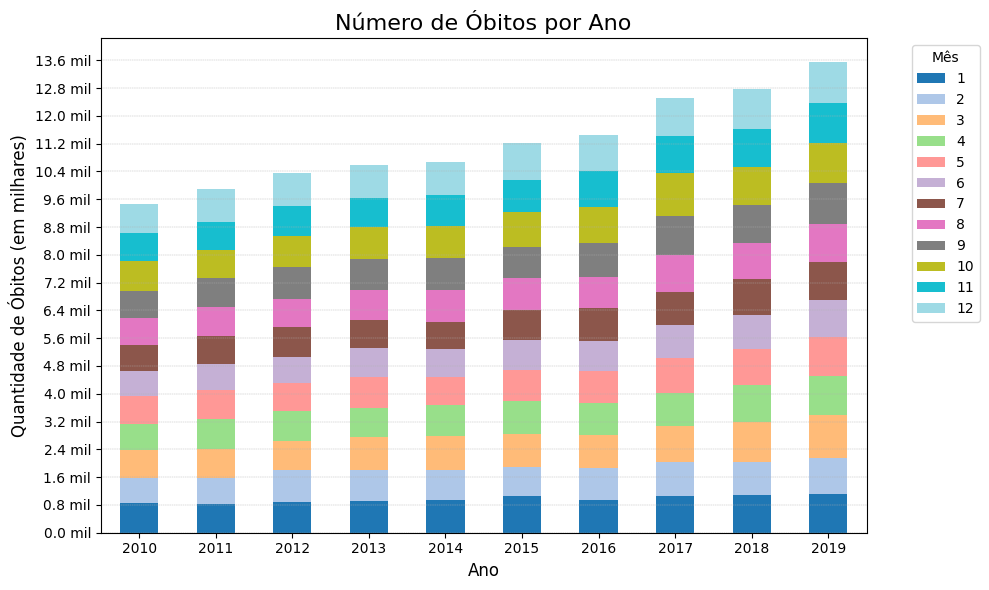

In [ ]:
# Gerando gráfico a partir do dataframe de óbitos por ano e mês

# Gerando df pivot
df_pivot = df_obitos_por_mes_ano.pivot_table(values='quantidade_obitos', index='ano', columns='mes', fill_value=0)

# Plotando o gráfico de barras empilhadas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Definindo os rótulos e título do gráfico
plt.title('Número de Óbitos por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Óbitos (em milhares)', fontsize=12)
plt.xticks(rotation=0)

# Adicionando legenda
plt.legend(title='Mês', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando grid
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.3)

# Definindo os intervalos de 800 em 800 no eixo Y
ax.yaxis.set_major_locator(MultipleLocator(800))

# Adicionando o formatador para o eixo Y
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valor))

# Exibindo o gráfico
plt.tight_layout()
plt.show()

A análise gráfica revela uma tendência crescente no número de óbitos entre 2010 e 2019, com um aumento mais acentuado nos últimos três anos (2017 a 2019). O número anual de óbitos subiu de aproximadamente 9,5 mil em 2010 para cerca de 13,6 mil em 2019, indicando um crescimento significativo ao longo do período analisado.

Esse aumento é atribuído a uma elevação gradual no número de óbitos em cada mês do ano. Embora tenha havido variações mensais ao longo do período, o total de registros aumentou em todos os meses, refletindo um crescimento consistente em todo o ano.

#### Quantidades de Óbitos por Ano e Sexo

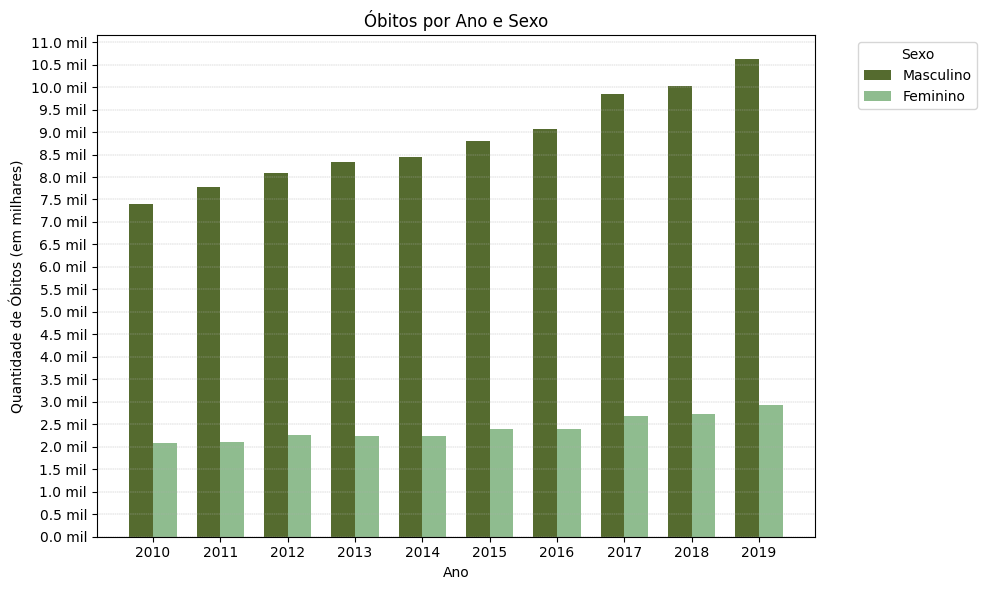

In [ ]:
# Gerando gráfico a partir do dataframe de sexo e ano

# Agrupando por ano, SEXO e quantidade obitos
df_agrupado = df_obitos_por_sexo_mes_ano.groupby(['ano', 'SEXO'])['quantidade_obitos'].sum().unstack()

# Tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Lista de anos
anos = df_agrupado.index

# Posição no eixo X para cada ano
x = np.arange(len(anos))

# Largura das barras
largura = 0.35

# Barras para Masculino e Feminino
barra_masculino = ax.bar(x - largura/2, df_agrupado['Masculino'], largura, label='Masculino', color='#556B2F')
barra_feminino = ax.bar(x + largura/2, df_agrupado['Feminino'], largura, label='Feminino', color='#8FBC8F')

# Personalizando o gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Óbitos (em milhares)')
ax.set_title('Óbitos por Ano e Sexo')
ax.set_xticks(x)
ax.set_xticklabels(anos)

# Adicionando grid
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.3)

# Adicionando legenda
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Definindo os intervalos de 500 em 500 no eixo Y
ax.yaxis.set_major_locator(MultipleLocator(500))

# Adicionando o formatador para o eixo Y
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valor))

# Exibir gráfico
plt.tight_layout()
plt.show()

A análise gráfica mostra uma discrepância crescente no número de óbitos anuais entre homens e mulheres de 2010 a 2019. Em 2010, os óbitos masculinos eram aproximadamente 5,5 mil a mais do que os femininos. Até 2019, essa diferença aumentou para cerca de 7,5 mil.

Essa ampliação da diferença se deve ao aumento mais acentuado nos óbitos masculinos. Aproximadamente, o número de óbitos masculinos subiu de 7,4 mil em 2010 para cerca de 10,6 mil em 2019. Por outro lado, o número de óbitos femininos cresceu de aproximadamente 2 mil para 3 mil no mesmo período.

#### Quantidades de Óbitos por Ano e Raça

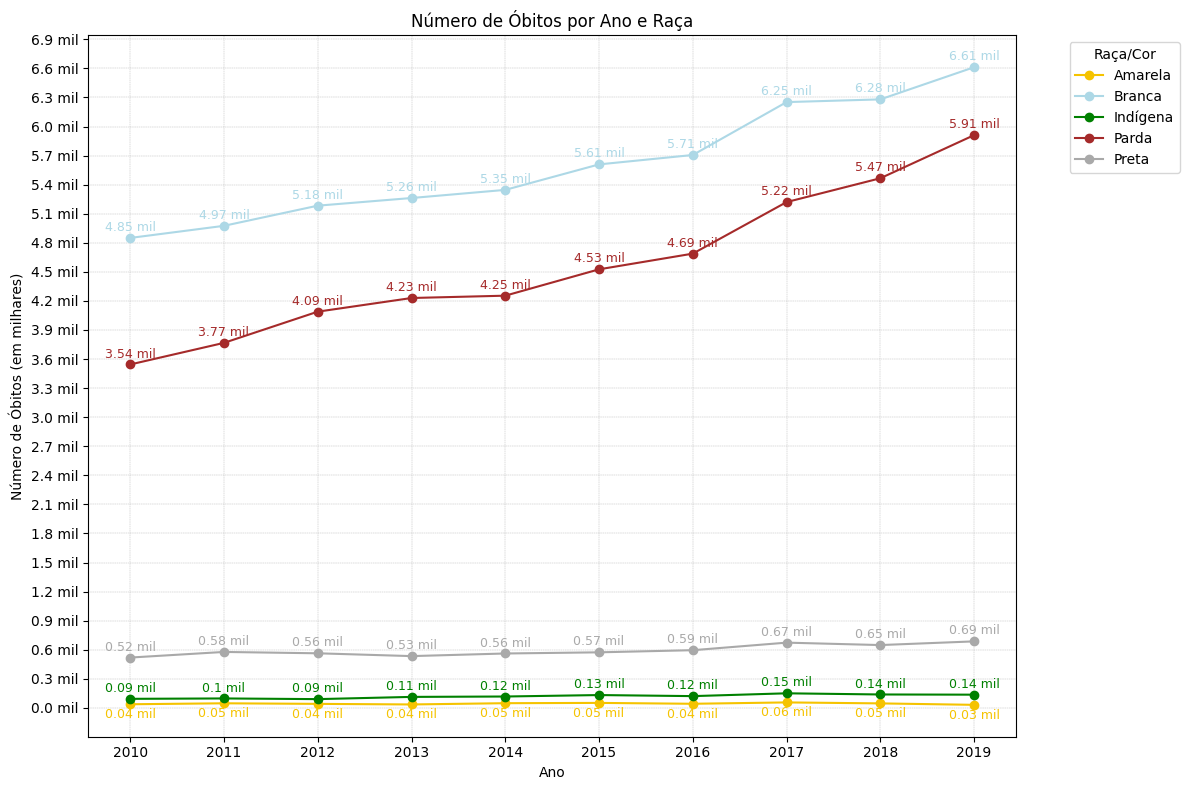

In [ ]:
# Gerando gráfico a partir do dataframe de raça e ano

# Agrupar os dados por ano e raça/cor e somar a quantidade de óbitos
df_agrupado = df_obitos_por_raca_mes_ano.groupby(['ano', 'RACACOR'])['quantidade_obitos'].sum().unstack()

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Definir cores para cada categoria de raça/cor
cores = {
    'Amarela': '#F5C300',    # Amarelo mostarda
    'Branca': 'lightblue',   # Azul claro
    'Indígena': 'green',     # Verde
    'Parda': 'brown',        # Marrom
    'Preta': 'darkgray'      # Cinza escuro
}

# Plotar linhas para cada categoria de raça/cor
for raca_cor in df_agrupado.columns:
    # Plotar a linha e os marcadores
    ax.plot(df_agrupado.index, df_agrupado[raca_cor], marker='o', label=raca_cor, color=cores[raca_cor])

    # Adicionar valores aos marcadores
    for x, y in zip(df_agrupado.index, df_agrupado[raca_cor]):
        valor_formatado = formatar_valor(y, 1)
        posicao_label = (0, -10) if raca_cor == 'Amarela' else (0, 5)

        ax.annotate(valor_formatado, (x, y), textcoords="offset points", xytext=posicao_label, ha='center', fontsize=9, color=cores[raca_cor])

# Personalizar o gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Óbitos (em milhares)')
ax.set_title('Número de Óbitos por Ano e Raça')

# Adicionando grid
ax.grid(True, which='both', linestyle='--', linewidth=0.3)

# Ajustar intervalos no eixo Y para 300 unidades
ax.yaxis.set_major_locator(MultipleLocator(300))

# Formatador para o eixo Y
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valor))

# Adicionar a legenda
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout do gráfico
plt.xticks(df_agrupado.index)
plt.tight_layout()

# Exibir o gráfico
plt.show()

A análise do gráfico revela que, entre 2010 e 2019, a ordem das categorias raciais em relação ao número de óbitos permaneceu a mesma:
  1. Branca
  2. Parda
  3. Preta
  4. Indígena
  5. Amarela

As taxas de óbitos para as categorias Preta, Indígena e Amarela permaneceram relativamente estáveis ao longo do período analisado, com menos de 0,7 mil registros por ano em cada uma dessas categorias. Em contraste, as categorias Branca e Parda apresentaram um crescimento significativo. O número de óbitos entre indivíduos Pardos aumentou de aproximadamente 3,54 mil para 5,91 mil, enquanto, entre os Brancos, subiu de cerca de 4,85 mil para 6,61 mil.

Esse aumento expressivo nas categorias Branca e Parda evidencia uma mudança importante quando comparado à estabilidade observada nas demais categorias, destacando uma tendência de crescimento mais acentuado nesses grupos ao longo do tempo.

#### Quantidade de Óbitos Por Ano e Estado

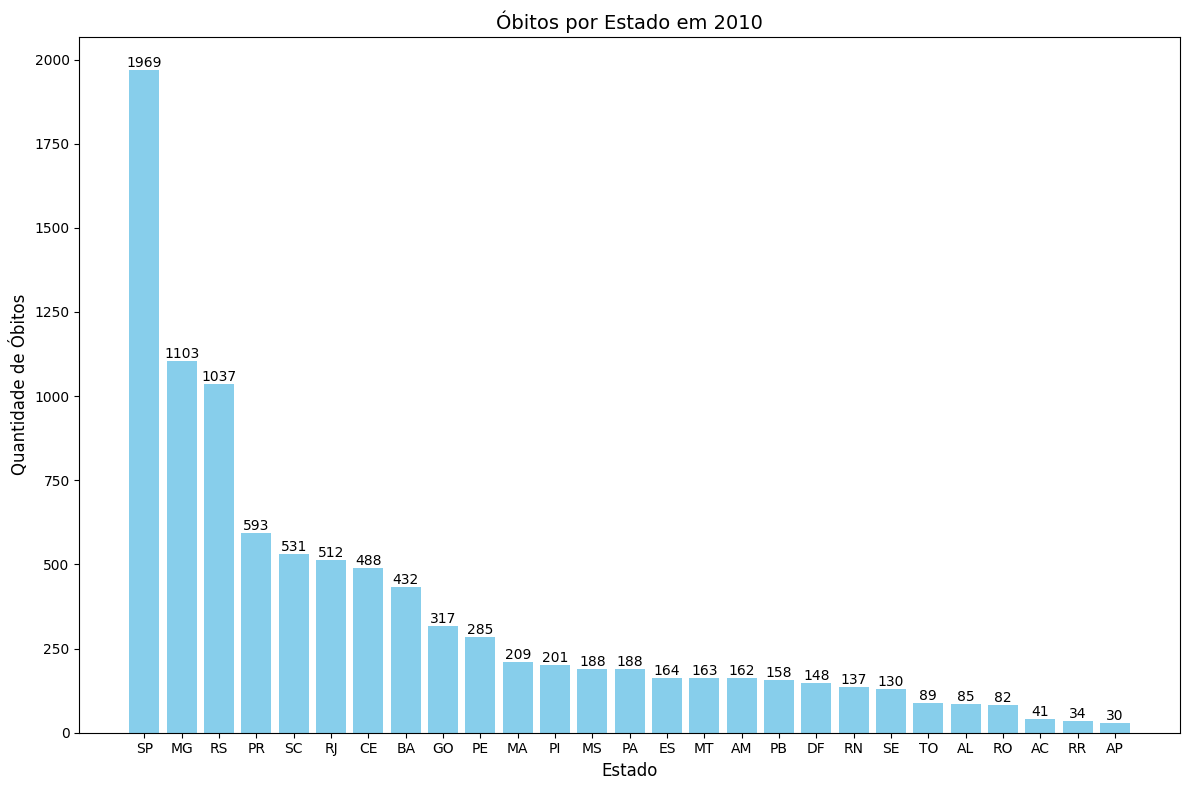

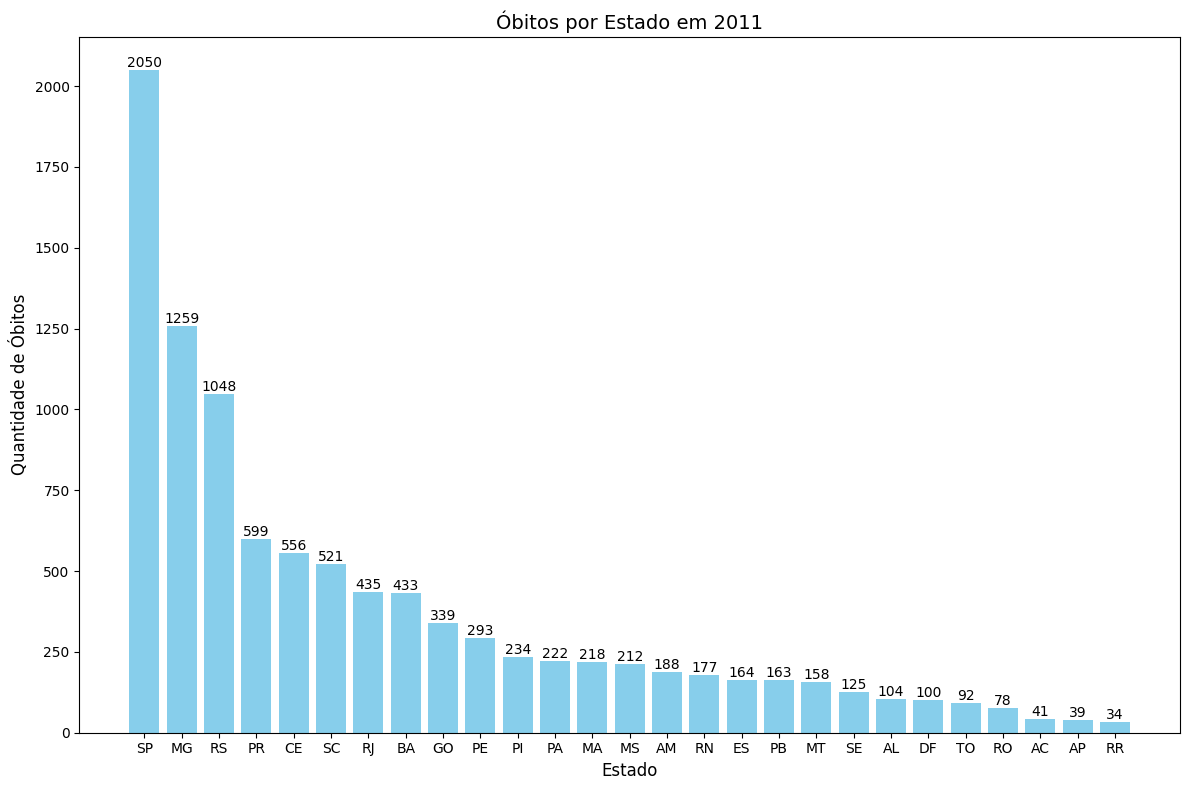

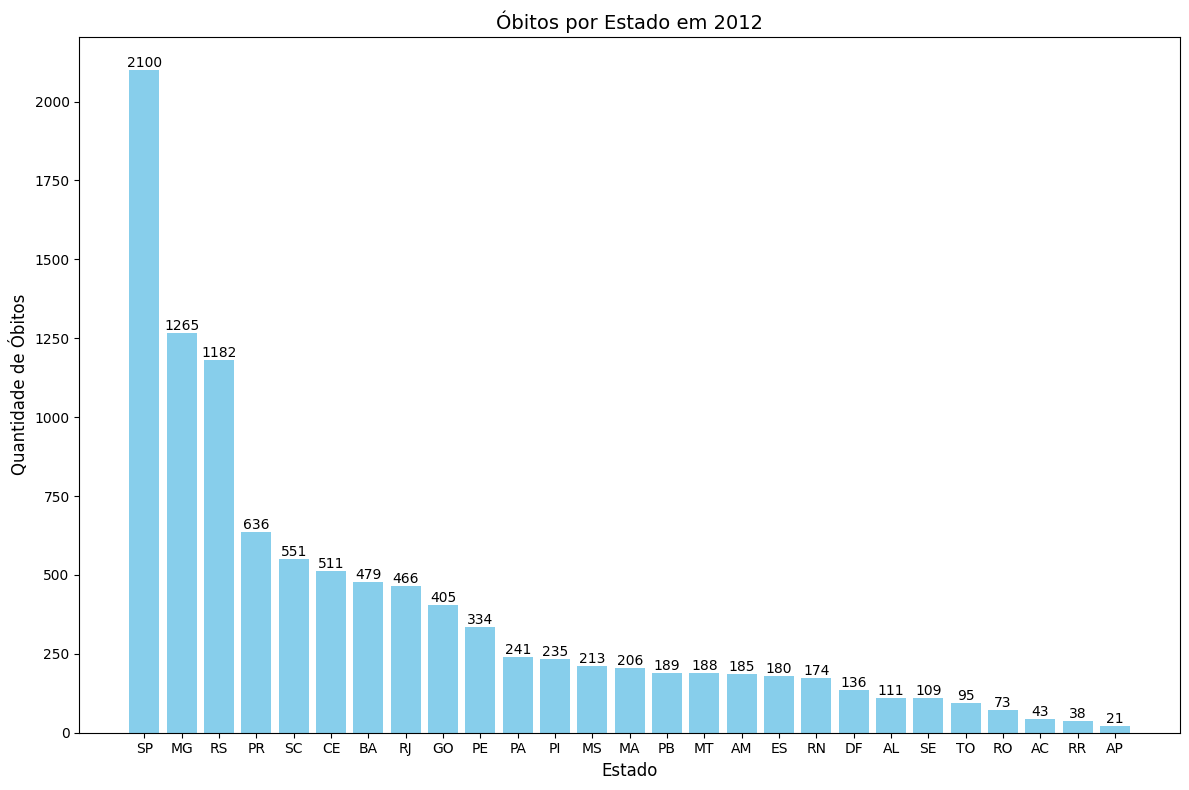

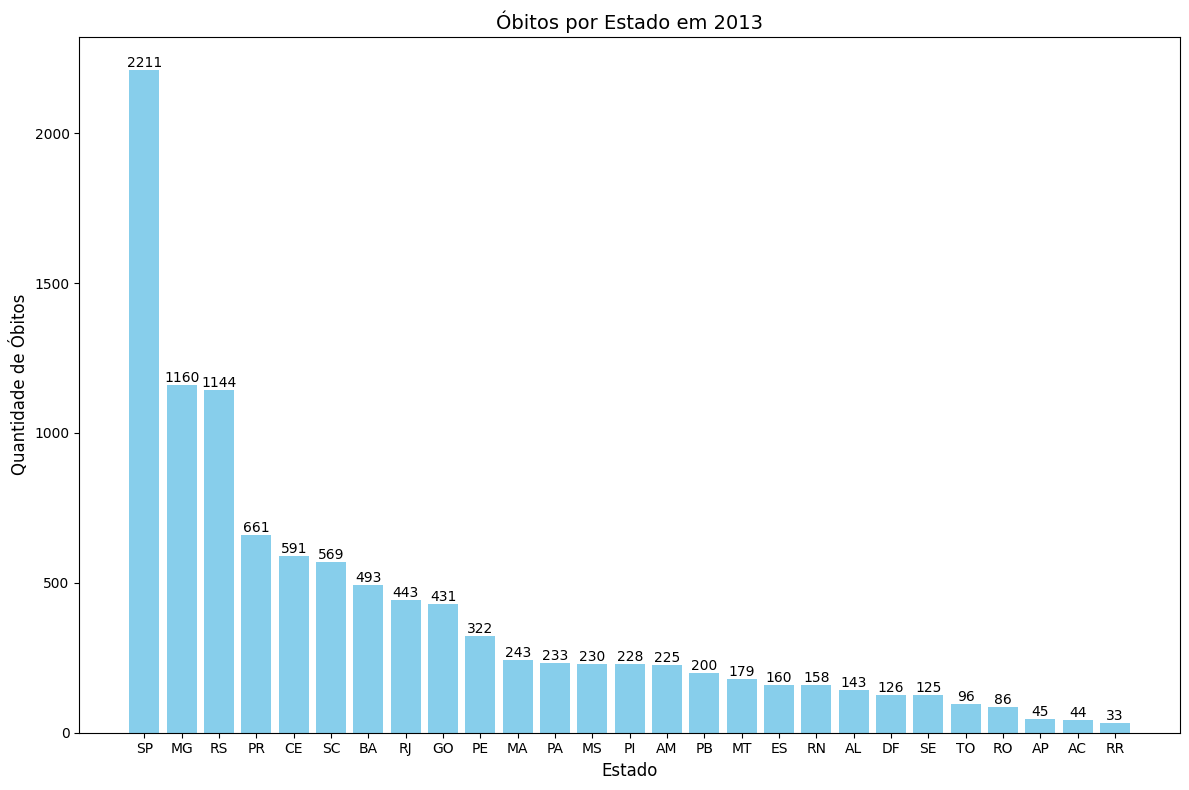

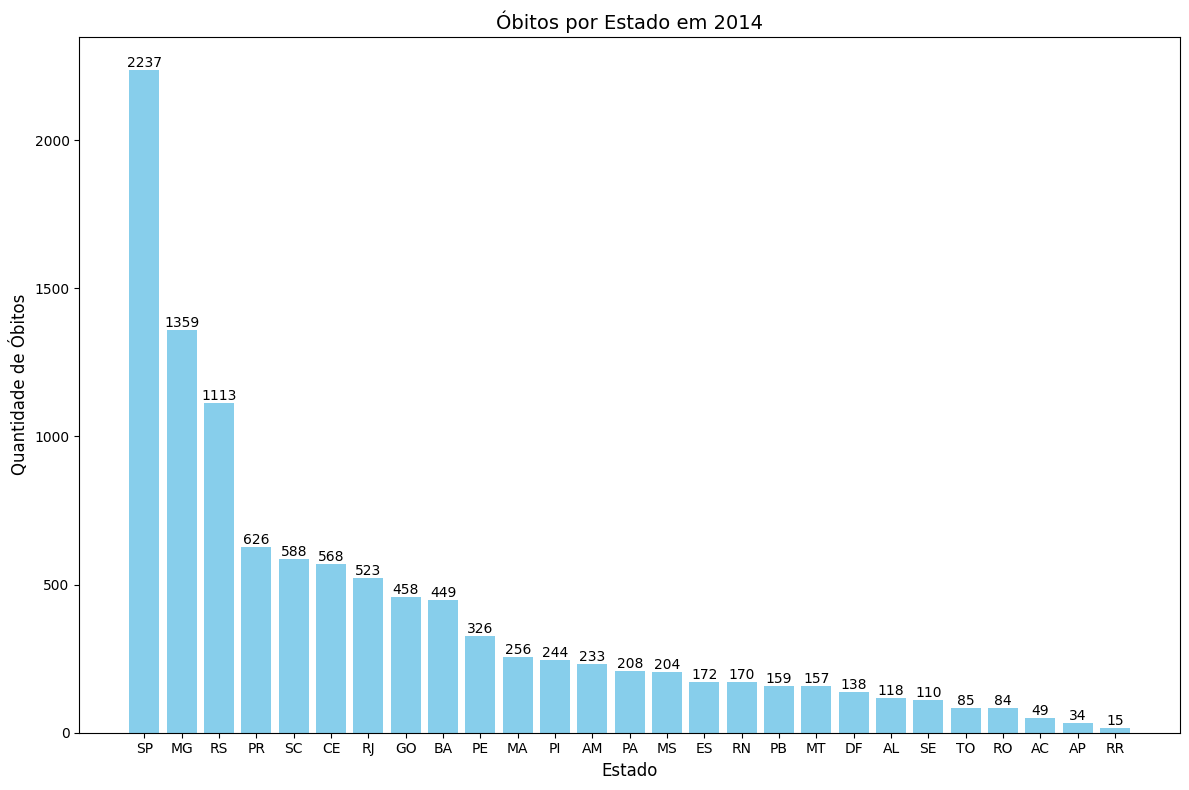

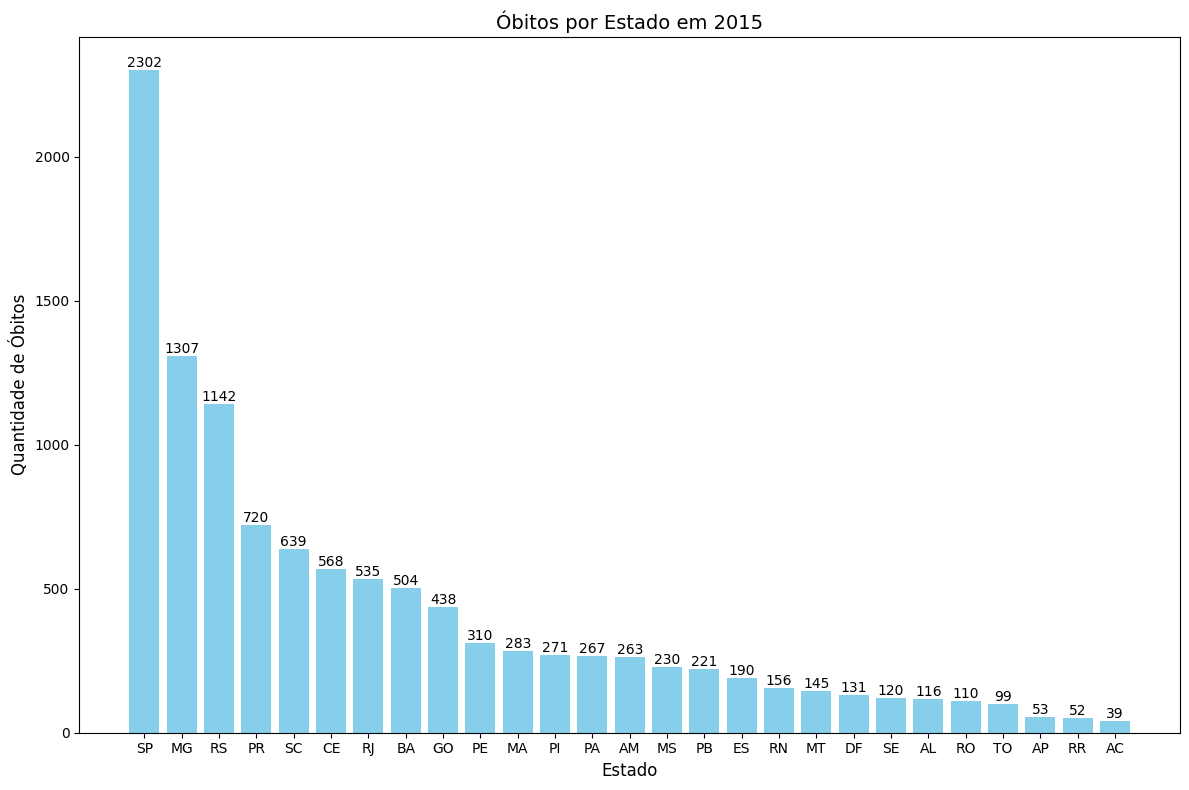

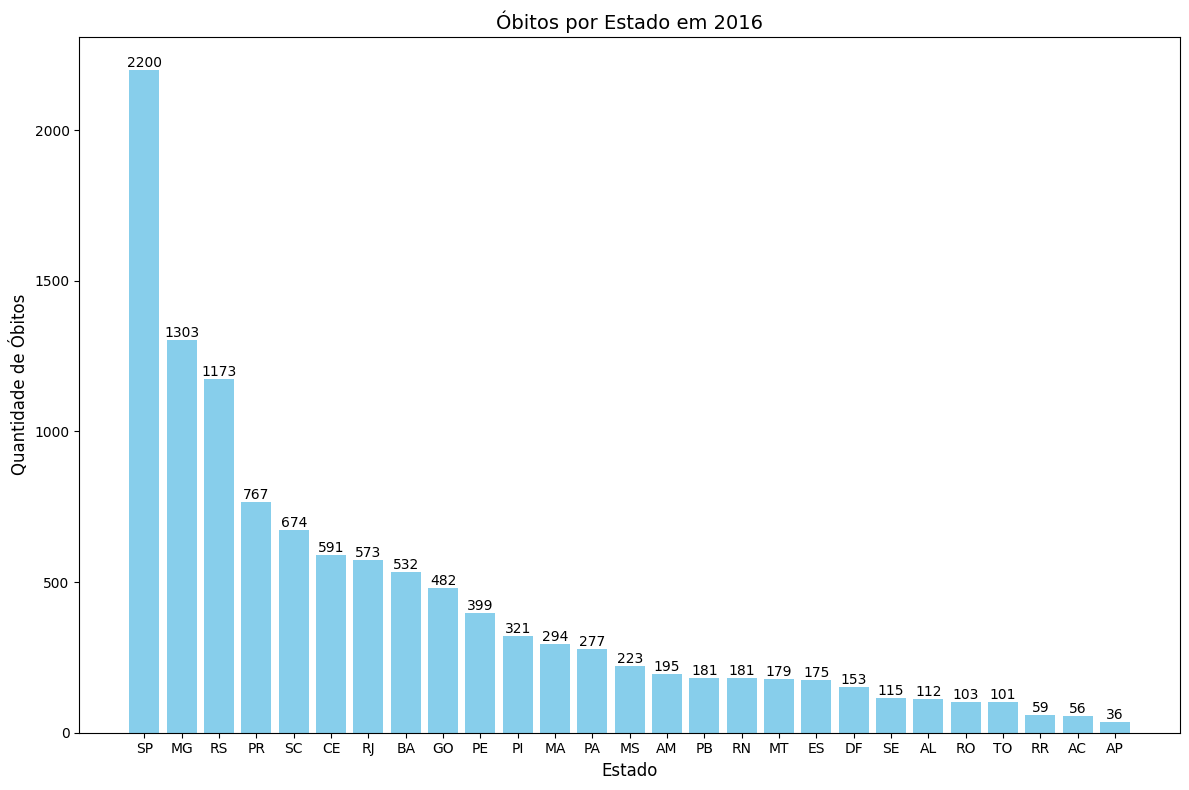

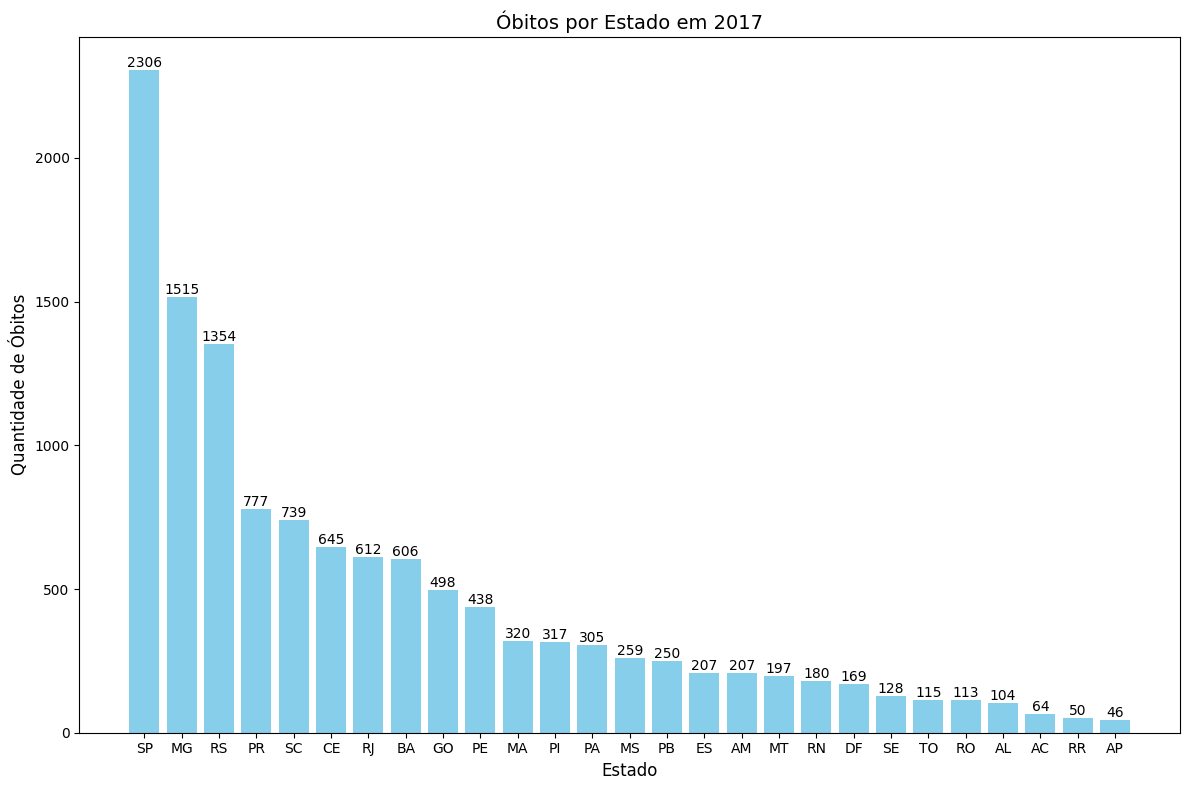

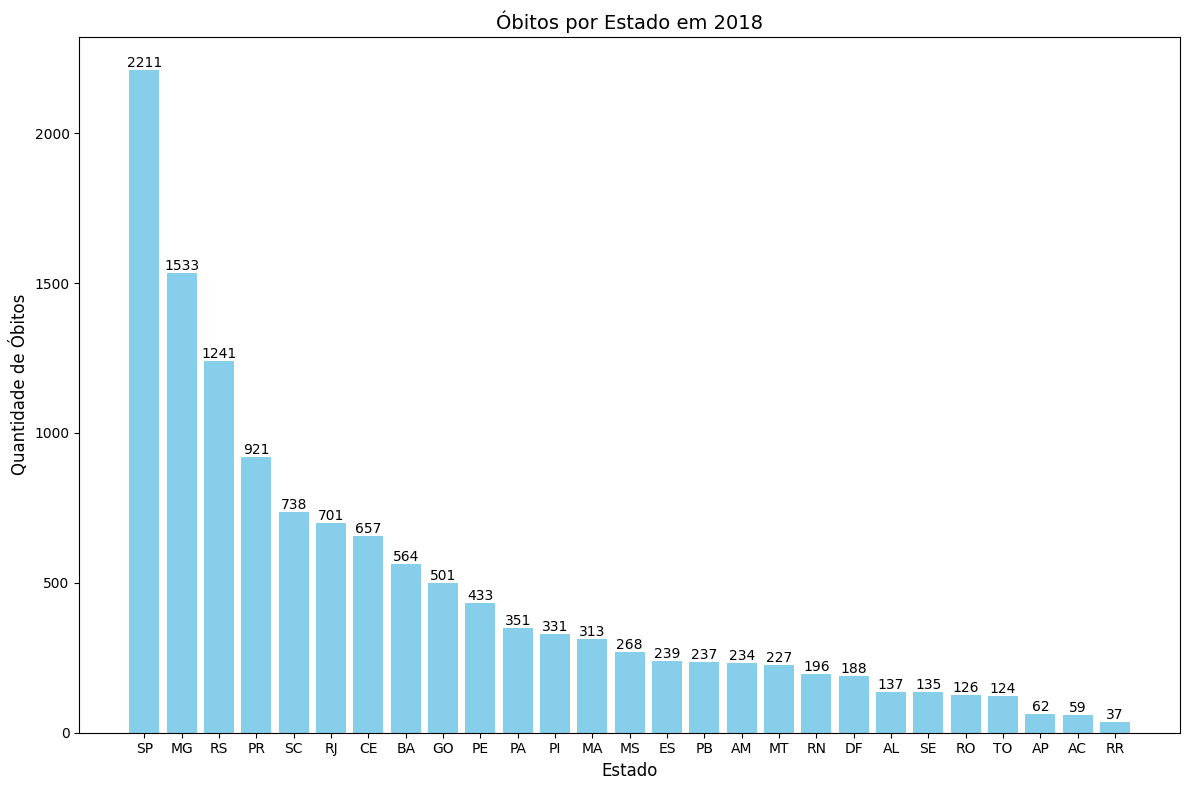

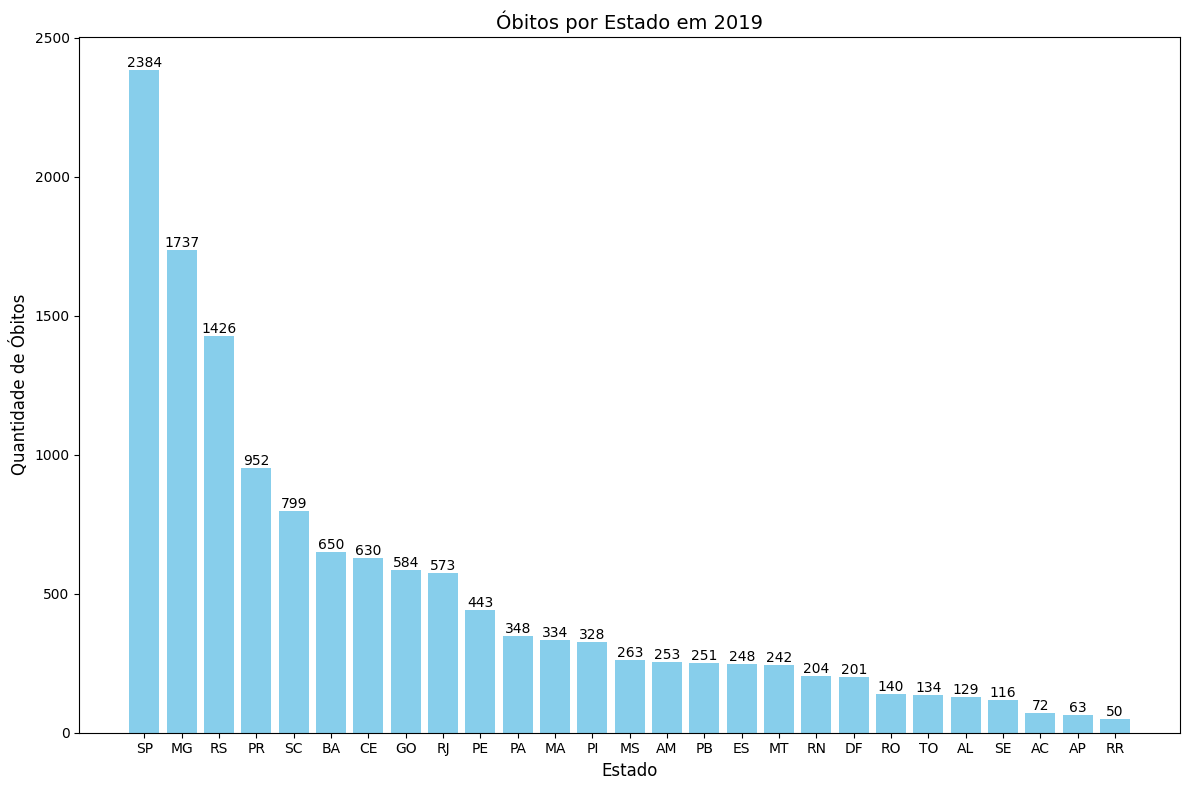

In [ ]:
# Gerando gráfico a partir do dataframe de estado e ano

# Obter os anos únicos do DataFrame
anos = df_obitos_por_estado_mes_ano['ano'].unique()

# Loop para criar um gráfico para cada ano
for ano in anos:
    df_ano = df_obitos_por_estado_mes_ano[df_obitos_por_estado_mes_ano['ano'] == ano]
    df_agrupado = df_ano.groupby('estado').agg({'quantidade_obitos': 'sum'}).reset_index()
    df_ordenado = df_agrupado.sort_values(by=['quantidade_obitos'], ascending=[False])

    plt.figure(figsize=(12,8))

    # Criar o gráfico de barras verticais
    barras = plt.bar(df_ordenado['estado'], df_ordenado['quantidade_obitos'], color='skyblue')

    # Adicionar título e rótulos
    plt.title(f'Óbitos por Estado em {ano}', fontsize=14)
    plt.xlabel('Estado', fontsize=12)
    plt.ylabel('Quantidade de Óbitos', fontsize=12)

    # Adicionar rótulos com os valores acima das barras
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.0f}',
                 ha='center', va='bottom', fontsize=10)

    # Ajustar layout
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

Os gráficos acima ilustram o número de óbitos por estado em cada ano entre 2010 e 2019. A análise revela que os cinco estados com o maior número de óbitos ao longo dos anos foram quase sempre os mesmos. São Paulo, Minas Gerais, Rio Grande do Sul e Paraná se mantiveram consistentemente nas quatro primeiras posições. O quinto lugar apresentou uma alternância entre Santa Catarina e Ceará de 2010 a 2014, mas, a partir de então, Santa Catarina se estabeleceu como o quinto estado com o maior número de óbitos nos anos seguintes.

De maneira geral, observa-se um crescimento gradual no número de óbitos nas posições mais altas. Esse aumento é mais sutil nas últimas posições, enquanto é mais acentuado entre os três primeiros estados.

#### Quantidade de Óbitos Por Ano e Local de Ocorrência

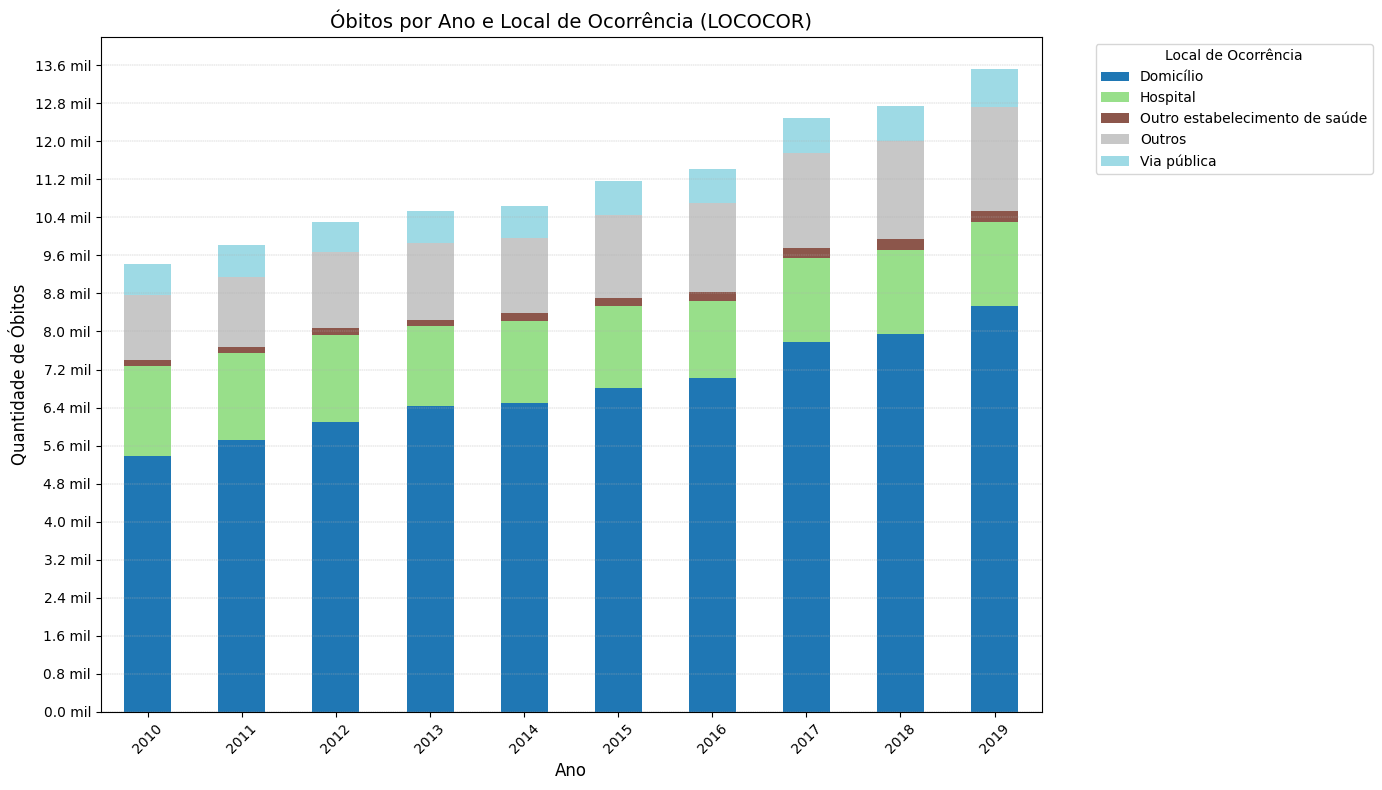

In [ ]:
# Gerando gráfico a partir do dataframe de ano e local de ocorrencia

# Pivotar os dados para preparar para o gráfico empilhado
df_pivot = df_obitos_por_local_mes_ano.pivot_table(index=['ano'], columns='LOCOCOR', values='quantidade_obitos', aggfunc='sum', fill_value=0)

# Gerando df pivot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')

# Adicionar rótulos e título
plt.title('Óbitos por Ano e Local de Ocorrência (LOCOCOR)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Óbitos', fontsize=12)
plt.xticks(rotation=45)

# Adicionando legenda
plt.legend(title='Local de Ocorrência', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando grid
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.3)

# Definindo os intervalos de 800 em 800 no eixo Y
ax.yaxis.set_major_locator(MultipleLocator(800))

# Adicionando o formatador para o eixo Y
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valor))

# Exibindo o gráfico
plt.tight_layout()
plt.show()

A partir da análise do gráfico acima, percebe-se que a maioria dos casos de suicídios entre 2010 e 2019 ocorreu em domicílio, seguida por ocorrências em hospitais. Uma parcela menor foi registrada em via pública e outros estabelecimentos de saúde. É importante destacar que há uma quantidade significativa de casos em que o local da morte não foi informado, categorizados como 'outros'.

Além disso, observa-se uma tendência de crescimento no número de óbitos em todas as categorias ao longo dos anos.

## Pré-processamento de dados:

Nesta etapa, os dados de suicídios serão ajustados para torná-los mais adequados e alinhados aos objetivos do análise.

### Tratamento dos Dados Faltantes

Na seção de análise dos dados, foi realizado um estudo sobre o grau de impacto de cada atributo com relação à quantidade de dados faltantes. Nesta etapa, será feito o tratamento desses atributos.

#### Remoção de Atributos Impactantes

Nesta etapa, serão **removidos** os **atributos** com grau de **impacto** **elevado** e **crítico**, ou seja, que não apresentam dados suficientes para uma análise eficaz. Os atributos que serão excluídos são:
* ESC.
* ASSISTMED.
* OCUP.
* CIRURGIA.
* ESCMAE.

In [ ]:
# Removendo atributos com grau de impacto Elevado e Crítico

colunas_alto_grau_impacto = ["ESC", "ASSISTMED", "OCUP", "CIRURGIA", "ESCMAE"]
new_dataframe = dataframe.drop(columns=colunas_alto_grau_impacto)

print(f"Numero antigo de atributos: {dataframe.shape[1]}")
print(f"Numero novo de atributos: {new_dataframe.shape[1]}")

Numero antigo de atributos: 17
Numero novo de atributos: 12


#### Adequação de Valores Faltantes

Nesta etapa, os valores faltantes serão tratados e substituídos por valores adequados, de forma a não comprometer a qualidade da análise geral dos dados.

In [ ]:
# Obtendo valores faltantes atuais
valores_faltantes = new_dataframe.isnull().sum()
print(f"Antes: \n{valores_faltantes[valores_faltantes > 0]}\n")

# Substituindo valores faltantes das colunas SEXO, CAUSABAS_O, LOCOCOR, RACACOR e ESTCIV pela moda
colunas_moda = ["SEXO", "CAUSABAS_O", "LOCOCOR", "RACACOR", "ESTCIV"]

for coluna in colunas_moda:
    moda = new_dataframe[coluna].mode()[0]
    new_dataframe[coluna].fillna(moda, inplace=True)

# Substituindo valores faltantes de DTNASC pela mediana
new_dataframe['DTNASC'] = pd.to_datetime(new_dataframe['DTNASC'], errors='coerce')
mediana_dt_nasc = new_dataframe['DTNASC'].median()
new_dataframe['DTNASC'].fillna(mediana_dt_nasc, inplace=True)

# Verificando se ainda existem valores nulos no DataFrame
valores_faltantes = new_dataframe.isnull().sum()

# Exibindo apenas as colunas que ainda possuem valores faltantes
print(f"\nDepois: \n{valores_faltantes[valores_faltantes > 0]}")

Antes: 
DTNASC        10858
SEXO             22
RACACOR        3171
ESTCIV         8700
CAUSABAS_O      287
LOCOCOR         460
dtype: int64


Depois: 
Series([], dtype: int64)


No código acima, as colunas categóricas como SEXO, CAUSABAS_O, LOCOCOR, RACACOR e ESTCIV tiveram seus valores faltantes substituídos pela moda, que corresponde ao valor mais frequente em cada atributo. Essa abordagem foi escolhida porque, em atributos categóricos, a moda é uma opção eficiente, já que preserva a representatividade das categorias dominantes, reduzindo o impacto de possíveis distorções na análise.

Por outro lado, a coluna DTNASC, que contém datas, teve seus valores faltantes substituídos pela mediana. A mediana é ideal nesse caso, pois insere uma data central na distribuição, atenuando o efeito de valores extremos e proporcionando uma solução mais equilibrada. Como a DTNASC representa uma variável de tempo, a mediana se mostra mais apropriada do que a moda, garantindo que os valores preenchidos reflitam melhor a distribuição temporal dos dados.

Com esses tratamentos, garantimos que o novo dataframe não conterá mais valores faltantes, tornando os dados mais completos e prontos para a análise subsequente.

### Criação de Coluna de Região

Nesta etapa, será criada uma coluna de "REGIAO" para cada óbito, com base no estado onde ocorreu.

In [ ]:
# Dicionário mapeando estados para regiões
estado_para_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
    'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
    'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
    'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

# Criando a nova coluna 'Região' com base no estado
new_dataframe['REGIAO'] = new_dataframe['estado'].map(estado_para_regiao)

# Exibindo as primeiras linhas para verificar a nova coluna
print(new_dataframe[['estado', 'REGIAO']].head())

# Verificando se há valores nulos na coluna 'REGIAO'
valores_nulos = new_dataframe['REGIAO'].isnull().sum()

# Exibindo o resultado
if valores_nulos == 0:
    print("\nTodos os valores da coluna 'REGIAO' foram preenchidos corretamente.")
else:
    print(f"\nExistem {valores_nulos} valores não preenchidos na coluna 'REGIAO'.")

  estado REGIAO
0     AC  Norte
1     AC  Norte
2     AC  Norte
3     AC  Norte
4     AC  Norte

Todos os valores da coluna 'REGIAO' foram preenchidos corretamente.


Como podemos observar, todas as tuplas do conjunto de dados foram preenchidas corretamente com suas respectivas regiões.

### Criação e Discretização da Coluna de Idade

Nesta etapa, será criada a coluna Idade, calculada com base na diferença entre DTOBITO e DTNASC. Em seguida, a idade será discretizada em uma nova coluna chamada Grupo de Idade, divididas nas seguintes categorias:

* **0-12 anos**: Grupo de indivíduos na infância.
* **13-19 anos**: Grupo de indivíduos na adolescência.
* **20-39 anos**: Grupo de jovens adultos.
* **40-59 anos**: Grupo de indivíduos na meia-idade.
* **60-79 anos**: Grupo de idosos.
* **80 anos ou mais**: Grupo de longevos.

In [ ]:
# Convertendo as colunas DTNASC e DTOBITO para o formato datetime
new_dataframe['DTNASC'] = pd.to_datetime(new_dataframe['DTNASC'], errors='coerce')
new_dataframe['DTOBITO'] = pd.to_datetime(new_dataframe['DTOBITO'], errors='coerce')

# Calculando a idade
new_dataframe['IDADE'] = (new_dataframe['DTOBITO'] - new_dataframe['DTNASC']).dt.days // 365

# Definindo a função para discretização da idade
def faixa_etaria(idade):
    if idade < 13:
        return '0-12 anos'
    elif 13 <= idade < 20:
        return '13-19 anos'
    elif 20 <= idade < 40:
        return '20-39 anos'
    elif 40 <= idade < 60:
        return '40-59 anos'
    elif 60 <= idade < 80:
        return '60-79 anos'
    else:
        return '80 anos ou mais'

# Aplicando a função para criar a coluna discretizada Grupo de Idade
new_dataframe['Grupo de Idade'] = new_dataframe['IDADE'].apply(faixa_etaria)

# Exibindo o DataFrame resultante
print(new_dataframe[['DTNASC', 'DTOBITO', 'IDADE', 'Grupo de Idade']])

           DTNASC    DTOBITO  IDADE Grupo de Idade
0      1999-11-09 2010-01-31     10      0-12 anos
1      1985-09-23 2010-02-07     24     20-39 anos
2      1995-08-06 2010-02-19     14     13-19 anos
3      1983-12-25 2010-04-20     26     20-39 anos
4      1982-05-13 2010-07-24     28     20-39 anos
...           ...        ...    ...            ...
112486 1991-08-10 2019-09-14     28     20-39 anos
112487 1967-02-17 2019-09-26     52     40-59 anos
112488 1977-07-20 2019-08-07     42     40-59 anos
112489 1978-05-03 2019-10-04     41     40-59 anos
112490 1975-06-12 2019-09-27     44     40-59 anos

[112491 rows x 4 columns]


### Exclusão de Outliers de Idade

Nesta etapa, serão excluídos os registros que apresentam valores negativos para a idade, pois esses valores são inválidos e não correspondem a idades reais.

In [ ]:
# Verificando idades invalidas
df_invalido = new_dataframe[new_dataframe['IDADE'] < 0]
idades_invalidas = list(df_invalido['IDADE'].unique())
num_dados_invalidos = df_invalido.shape[0]

# Excluindo os dados com idade menor que 0
new_dataframe = new_dataframe[new_dataframe['IDADE'] >= 0]

print(f"Idades invalidas: {idades_invalidas}.")
print(f"Número de dados excluídos: {num_dados_invalidos}.")

Idades invalidas: [-188, -186, -190, -184, -189, -187, -183, -182, -185, -181, -179, -180, -178, -177].
Número de dados excluídos: 202.


Durante a análise dos dados, foram encontrados 202 registros com idades negativas, que podem ser considerados outliers resultantes de possíveis erros de entrada ou problemas no cálculo da idade.

Para manter a integridade e a qualidade da análise, o código foi ajustado para remover esses registros do DataFrame, garantindo que essas informações incorretas não influenciem os resultados.

## Conclusão

Com a conclusão do trabalho, acredito que o objetivo foi plenamente alcançado, pois foi possível analisar a evolução dos suicídios no Brasil entre os anos de 2010 e 2019 sob diferentes perspectivas.

Foi possível compreender as variações nos óbitos de acordo com sexo, raça, estado, local de ocorrência e mês, ao longo dos períodos analisados. Além disso, gráficos foram gerados para facilitar a visualização dessas diferenças e destacar tendências ao longo do tempo.

Diversos estudos estatísticos também foram realizados para verificar a qualidade dos dados e aplicar possíveis tratamentos, resultando em um conjunto de dados mais confiável para o desenvolvimento de um futuro modelo.